# <span style='font-family:"Times New Roman"'>**CHURN PREDICTION**

<span style='font-family:"Roboto"'> Churn rate, also known as customer churn or attrition rate, shows the percentage of customers or subscribers who decide to stop interacting with a business, either by canceling their subscriptions or not renewing their contracts.

***

## <span style='font-family:"Roboto"'>**EXPLORATORY DATA ANALYSIS**

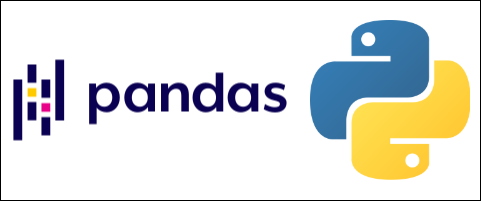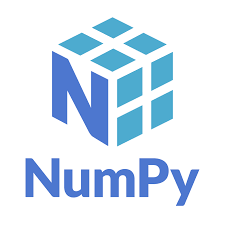

***

### <span style='font-family:"Roboto"'>**Data Preparation**

<span style='font-family:"Roboto"'> We will use Pandas to load the dataset into a dataframe, explore the different columns and ranges of values, handle missing values and incorrect datatypes, and generally prepare our data for analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns 
import matplotlib.ticker as mtick

##### <span style='font-family:"Roboto"'> Prepare data

<span style='font-family:"Roboto"'> We will load the dataset into Python to start performing EDA

In [2]:
df = pd.read_excel(r"C:\Users\RonaldOnyango\Desktop\Misc\BIA Assignment.xlsx", index_col='Identifier')

<span style='font-family:"Roboto"'> We will view the basic information about our data using df.info() and df.describe()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142902 entries, 63697470ede7fa7e107227c5 to 5ef55d5747d3881a67765258
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   joined_date       142901 non-null  object 
 1   gender            130577 non-null  object 
 2   age               141917 non-null  float64
 3   last active date  142902 non-null  object 
dtypes: float64(1), object(3)
memory usage: 5.5+ MB


In [4]:
df.describe()

,age
count,141917.000000
mean,25.119859
std,5.352209
min,18.000000
25%,22.000000
50%,24.000000
75%,27.000000
max,52.000000


<span style='font-family:"Roboto"'> At a glance, we already get an idea of top values per column 

In [5]:
df.columns

Index(['joined_date', 'gender', 'age', 'last active date'], dtype='object')

***

### <span style='font-family:"Roboto"'>**Data Cleaning**

<span style='font-family:"Roboto"'> **Find Null Values**

In [6]:
df['joined_date'].isna().value_counts()

False    142901
True          1
Name: joined_date, dtype: int64

In [7]:
df['gender'].isna().value_counts()

False    130577
True      12325
Name: gender, dtype: int64

In [8]:
df['age'].isna().value_counts()

False    141917
True        985
Name: age, dtype: int64

In [9]:
df['last active date'].isna().value_counts()

False    142902
Name: last active date, dtype: int64

<span style='font-family:"Roboto"'> **Drop null rows**

In [10]:
df_joinedDate = df.dropna(subset = ['joined_date'])

In [11]:
df_dropGenderNull = df_joinedDate.dropna(subset = ['gender'])

In [12]:
df_dropGenderNull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130577 entries, 63697470ede7fa7e107227c5 to 5ef5dfdb2ab4cf551d8bcfd4
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   joined_date       130577 non-null  object 
 1   gender            130577 non-null  object 
 2   age               129911 non-null  float64
 3   last active date  130577 non-null  object 
dtypes: float64(1), object(3)
memory usage: 5.0+ MB


In [13]:
df_ageMean = df['age'].mean()
df_ageMean

25.119858790701606

<span style='font-family:"Roboto"'> **Replace and fill null values**

In [14]:
df_fillGenderMean = df_dropGenderNull.fillna(26)

In [15]:
df = df_fillGenderMean.astype({"age": int})

In [16]:
df['gender'].value_counts()

male      91372
female    35851
Male       2023
Female     1319
Other        12
Name: gender, dtype: int64

<span style='font-family:"Roboto"'> Replace the sentence case gender values to lowercase.

In [17]:
replace_genderValues = df_fillGenderMean.replace(['Male', 'Female'], ['male', 'female'])

In [18]:
gender_counts = replace_genderValues['gender'].value_counts()
gender_counts

male      93395
female    37170
Other        12
Name: gender, dtype: int64

<span style='font-family:"Roboto"'> Format date column to datetime format

In [19]:
df['joined_date'] = df['joined_date'].apply(lambda x: pd.to_datetime(x, errors='coerce')).dropna()

<span style='font-family:"Roboto"'> Add churn column indicating whether the user is active or not. A churned user is defined as user that has not been active for over 90 days

In [20]:
df['churn'] = np.where(df['last active date'] == "> 90 days", "Churned", "Active")
df

,joined_date,gender,age,last active date,churn
Identifier,,,,,
63697470ede7fa7e107227c5,2022-07-11,female,23,2022-11-08 00:00:00,Active
636970fede80962555cb5e36,2022-07-11,male,22,2022-11-07 00:00:00,Active
636963a7de80962555cb5e1f,2022-07-11,male,29,2022-11-07 00:00:00,Active
636962fcde80962555cb5e15,2022-07-11,male,23,> 90 days,Churned
63696184de80962555cb5e0a,2022-07-11,male,26,2022-11-07 00:00:00,Active
...,...,...,...,...,...
5ef5ee15df376c7656e0c1f0,2020-06-26,male,45,> 90 days,Churned
5ef5ea68df376c7656e0c1ec,2020-06-26,female,30,2022-10-27 00:00:00,Active
5ef5e90cdf376c7656e0c1ea,2020-06-26,female,20,2022-08-24 00:00:00,Active


<span style='font-family:"Roboto"'> Add Churn Rate column

In [21]:
df['churn_rate'] = np.where(df['churn'] == "Churned", 1, 0)

Add count column. Set all values to 1

In [22]:
df['count'] = 1
df

,joined_date,gender,age,last active date,churn,churn_rate,count
Identifier,,,,,,,
63697470ede7fa7e107227c5,2022-07-11,female,23,2022-11-08 00:00:00,Active,0,1
636970fede80962555cb5e36,2022-07-11,male,22,2022-11-07 00:00:00,Active,0,1
636963a7de80962555cb5e1f,2022-07-11,male,29,2022-11-07 00:00:00,Active,0,1
636962fcde80962555cb5e15,2022-07-11,male,23,> 90 days,Churned,1,1
63696184de80962555cb5e0a,2022-07-11,male,26,2022-11-07 00:00:00,Active,0,1
...,...,...,...,...,...,...,...
5ef5ee15df376c7656e0c1f0,2020-06-26,male,45,> 90 days,Churned,1,1
5ef5ea68df376c7656e0c1ec,2020-06-26,female,30,2022-10-27 00:00:00,Active,0,1
5ef5e90cdf376c7656e0c1ea,2020-06-26,female,20,2022-08-24 00:00:00,Active,0,1


<span style='font-family:"Roboto"'> Add Age Band column to categorize age groups

In [23]:
df['AgeBand'] = np.where(df['last active date'] == "> 90 days", "Churned", "Active")

In [24]:
conditions =[
    (df['age']<20),
    (df['age']>=20) & (df['age']<25),
    (df['age']>=25) & (df['age']<31),
    (df['age']>=31) & (df['age']<36),
    (df['age']>35)
]
values = ['Under 20', '20 and 24', '25 and 30', '31 and 35', 'Above 35']
df['AgeBand'] = np.select(conditions, values)

In [25]:
churn_rate = df['churn_rate'].value_counts()
churn_rate

1    123223
0      7354
Name: churn_rate, dtype: int64

In [26]:
churn_counts = df['churn'].value_counts()
churn_counts

Churned    123223
Active       7354
Name: churn, dtype: int64

In [27]:
AgeBand_count = df['AgeBand'].value_counts()
AgeBand_count

20 and 24    67645
25 and 30    38993
31 and 35     9762
Under 20      8217
Above 35      5960
Name: AgeBand, dtype: int64

***

### <span style='font-family:"Roboto"'>**Visualization**

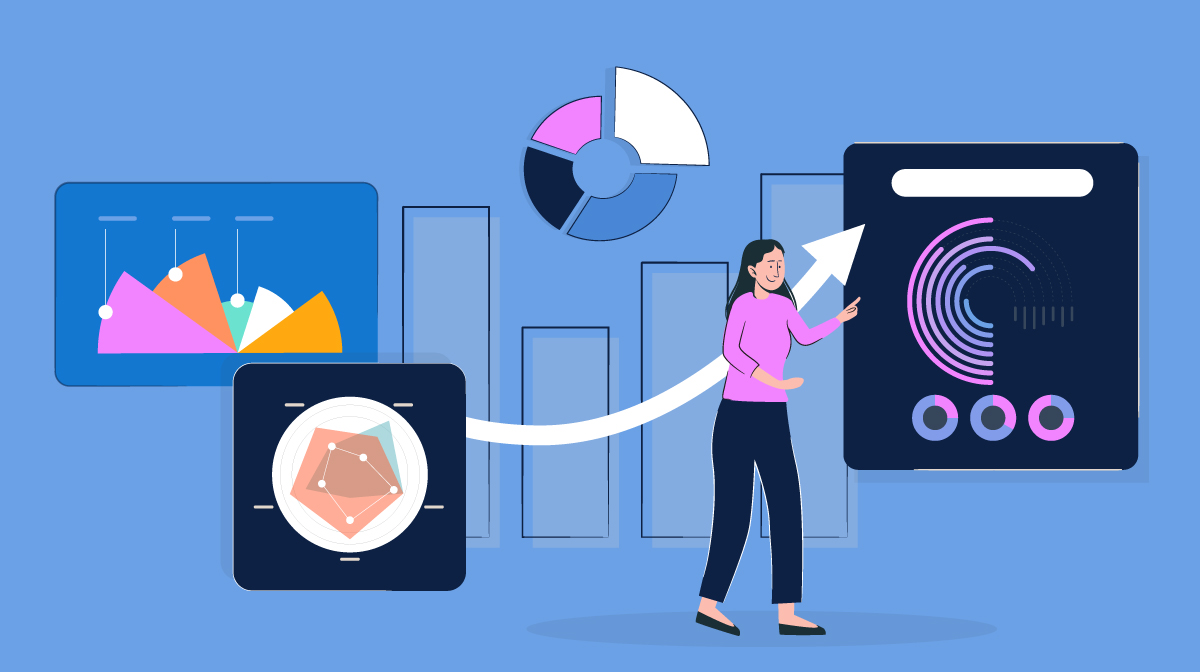

<span style='font-family:"Roboto"'> **Total Users by Gender**

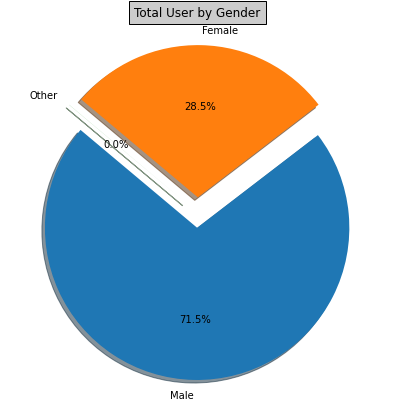

In [36]:
churn_label = ['Male', "Female", 'Other']
#colors = ['#23dcc2', '#fab400']
explode = (0.1, 0.1, 0.1)
fig = plt.figure(figsize =(10, 7))
plt.pie(gender_counts, labels = churn_label,autopct='%1.1f%%', shadow=True, startangle=140, explode = explode)
plt.title("Total User by Gender", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

<span style='font-family:"Roboto"'> **Age Distribution of Users**

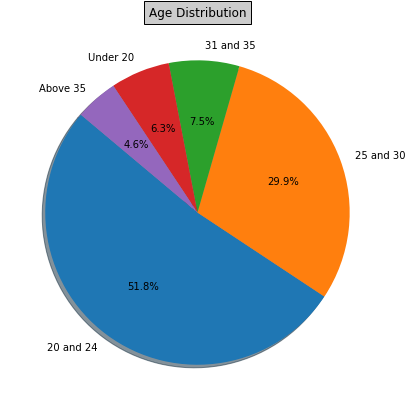

In [29]:
churn_label = ['20 and 24', "25 and 30", '31 and 35', 'Under 20', 'Above 35']
#colors = ['#23dcc2', '#fab400']
#explode = (0.1, 0.1, 0.1)
fig = plt.figure(figsize =(10, 7))
plt.pie(AgeBand_count, labels = churn_label,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Age Distribution", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

<span style='font-family:"Roboto"'> **Total Active User Base vs Total Churned User Base**

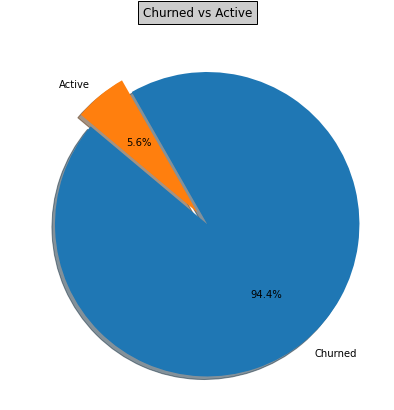

In [30]:
churn_label = ['Churned', "Active"]
#colors = ['#23dcc2', '#fab400']
explode = (0.1, 0)
fig = plt.figure(figsize =(10, 7))
plt.pie(churn_counts, labels = churn_label,autopct='%1.1f%%', shadow=True, startangle=140, explode = explode,)
plt.title("Churned vs Active", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

<span style='font-family:"Roboto"'> **Churn Rate by Year Joined**

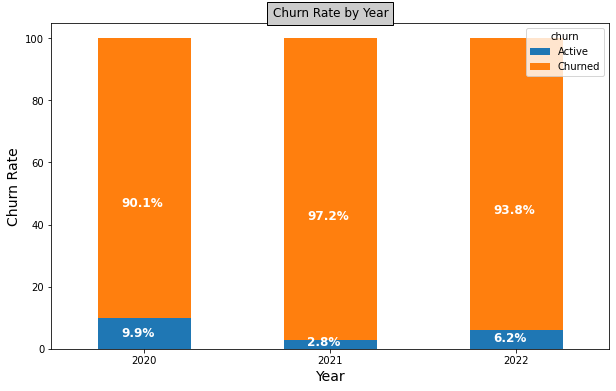

In [31]:
ax = ((df.groupby(lambda x: df['joined_date'][x].year)['churn'].value_counts(normalize=True)*100.0)
   .unstack('churn').plot.bar(stacked=True, rot =0 ,figsize=(10, 6))
)
plt.title("Churn Rate by Year", bbox={'facecolor':'0.8', 'pad':5})
ax.set_ylabel('Churn Rate',size = 14 )
ax.set_xlabel('Year', size = 14)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
   # x, y = p.get_xy() 
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), fontsize=12,
            color='white',
           weight = 'bold')

- It seems most users churned in 2021
- The same year had the lowest active user base

<span style='font-family:"Roboto"'> **Churn Rate by Gender Distribution**

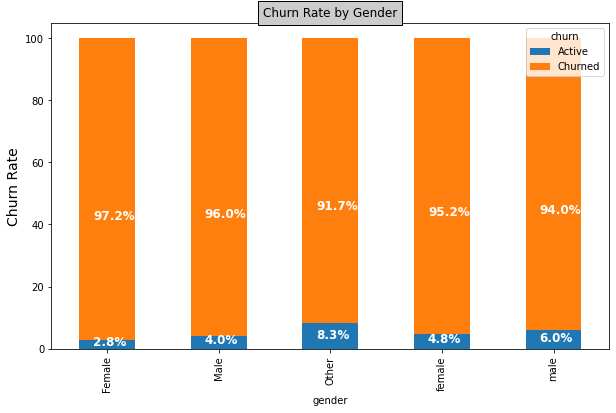

In [32]:
ax = ((df.groupby('gender')['churn'].value_counts(normalize=True)*100.0)
   .unstack('churn').plot.bar(stacked=True, figsize=(10, 6))
)
plt.title("Churn Rate by Gender", bbox={'facecolor':'0.8', 'pad':5})
ax.set_ylabel('Churn Rate',size = 14)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
   # x, y = p.get_xy() 
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), fontsize=12,
            color='white',
           weight = 'bold')

Females have a higher churn rate to males

<span style='font-family:"Roboto"'> **Churn Rate by Age Distribution**

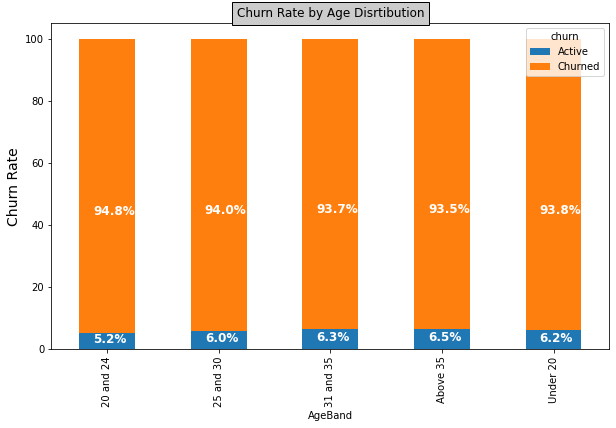

In [68]:
ax = ((df.groupby('AgeBand')['churn'].value_counts(normalize=True)* 100.0)
   .unstack('churn').plot.bar(stacked=True, figsize=(10, 6))
)
plt.title("Churn Rate by Age Disrtibution", bbox={'facecolor':'0.8', 'pad':5})
ax.set_ylabel('Churn Rate',size = 14)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
   # x, y = p.get_xy() 
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), fontsize=12,
            color='white',
           weight = 'bold')

Users between ages 20 and 24 are more likely to churn compared to other age groups

***

### <span style='font-family:"Roboto"'>**Conclusion**

1. The total number of males outnumbers females by ***43%***.
2. The age group between ***20*** and ***24*** has the highest percentage of users (***51%***), accounting for more than half of all users, but they also have the highest churn rate.
3. The year ***2021*** has the highest churn rate.
4. ***Females*** are more likely to churn than males. More content should be created targeting female users.
5. The overall churn rate is approximately ***94%***.

<div class="alert alert-block alert-success">
<b>My take:</b> With this data, a lot of insights can be found. I had to clean up over 12,000 empty records of data, which if were available would provide better insights. I'll continue exploring the data further, and create a churn prediction model
</div>

## <span style='font-family:"Roboto"'>**PREDICTION MODEL**